In [43]:
import pandas as pd 
import numpy as np
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import sklearn.ensemble as sk
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster import cluster_visualizer_multidim
from sklearn.decomposition import PCA

In [44]:
df=pd.read_csv("/content/drive/MyDrive/Assignment 3/dataset/more_than_50k.csv")
df

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,AUNTYPE,AWKSTAT,CAPGAIN,CAPLOSS,DIVVAL,FILESTAT,GRINREG,GRINST,HHDFMX,HHDREL,MIGMTR1,MIGMTR3,MIGMTR4,MIGSAME,MIGSUN,NOEMP,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,57,Self-employed-incorporated,11,2,High school graduate,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,500,Joint both under 65,Not in universe,Not in universe,Householder,Householder,?,?,?,Not in universe under 1 year old,?,2,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
1,44,Private,3,38,High school graduate,0,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,Nonmover,Nonmover,Nonmover,Yes,Not in universe,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,No,1,48,94
2,54,Private,19,26,High school graduate,1550,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,White,All other,Male,Yes,Not in universe,Children or Armed Forces,0,0,0,Joint both under 65,Not in universe,Not in universe,Householder,Householder,Nonmover,Nonmover,Nonmover,Yes,Not in universe,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
3,25,Private,33,2,9th grade,0,Not in universe,Never married,Retail trade,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Full-time schedules,13550,0,200,Single,Not in universe,Not in universe,Other Rel 18+ never marr not in subfamily,Other relative of householder,?,?,?,Not in universe under 1 year old,?,2,Not in universe,United-States,United-States,United-States,Native- Born in the United States,1,Not in universe,2,52,95
4,26,Private,11,5,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,White,All other,Female,Not in universe,Not in universe,Full-time schedules,0,0,100,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,?,?,?,Not in universe under 1 year old,?,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,57,Private,14,37,High school graduate,0,Not in universe,Divorced,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,2500,Single,Not in universe,Not in universe,Nonfamily householder,Householder,Nonmover,Nonmover,Nonmover,Yes,Not in universe,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
3576,63,Self-employed-not incorporated,37,12,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Separated,Business and repair services,Professional specialty,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Single,Not in universe,Not in universe,Nonfamily householder,Householder,Nonmover,Nonmover,Nonmover,Yes,Not in universe,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,49,94
3577,39,Private,41,6,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Married-civilian spouse present,Hospital services,Professional specialty,White,All other,Male,Not in universe,Not in universe,Full-time schedules

In [45]:
np.random.seed(0)
columns=df.columns
length=[]

df.replace(to_replace = " ?", value = np.NaN,inplace=True)

for i in columns:
  length.append(len(df[columns]))
print("No of Missing values")
for i in columns:
  print(i,df[i].isnull().sum())
for i in columns:
    percentage=(df[i].isnull().sum()/len(df[i]))*100
    #print(i+" ",percentage)
    if(percentage>40):
        df.drop(i,axis=1,inplace=True)
        

print((len(columns)- len(df.columns)),"Column drop from the DataFrame")
print("\nDropped Columns Are :")
for i in columns:
  if(i not in df.columns):
    print(i)
columns=df.columns
# print(len(columns))   
# print(len(df.columns))


No of Missing values
AAGE 0
ACLSWKR 0
ADTIND 0
ADTOCC 0
AHGA 0
AHRSPAY 0
AHSCOL 0
AMARITL 0
AMJIND 0
AMJOCC 0
ARACE 0
AREORGN 0
ASEX 0
AUNMEM 0
AUNTYPE 0
AWKSTAT 0
CAPGAIN 0
CAPLOSS 0
DIVVAL 0
FILESTAT 0
GRINREG 0
GRINST 14
HHDFMX 0
HHDREL 0
MIGMTR1 1906
MIGMTR3 1906
MIGMTR4 1906
MIGSAME 0
MIGSUN 1906
NOEMP 0
PARENT 0
PEFNTVTY 162
PEMNTVTY 134
PENATVTY 93
PRCITSHP 0
SEOTR 0
VETQVA 0
VETYN 0
WKSWORK 0
YEAR 0
4 Column drop from the DataFrame

Dropped Columns Are :
MIGMTR1
MIGMTR3
MIGMTR4
MIGSUN


In [46]:
description=pd.read_csv("/content/drive/MyDrive/Assignment 3/dataset/Dataset Description.csv")
#print(description["Column Code"])
categorical=[]
numerical=[]
for i in range(len(description["Column Code"])):
  for j in columns:
    if(j==description["Column Code"][i]):
      if(description["Type"][i]=='numerical'):
        numerical.append(j)
      else:
        categorical.append(j)

print(categorical)
print(numerical)


['ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN', 'YEAR']
['AAGE', 'AHRSPAY', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'WKSWORK']


In [47]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["xtick.labelsize"] = 7
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

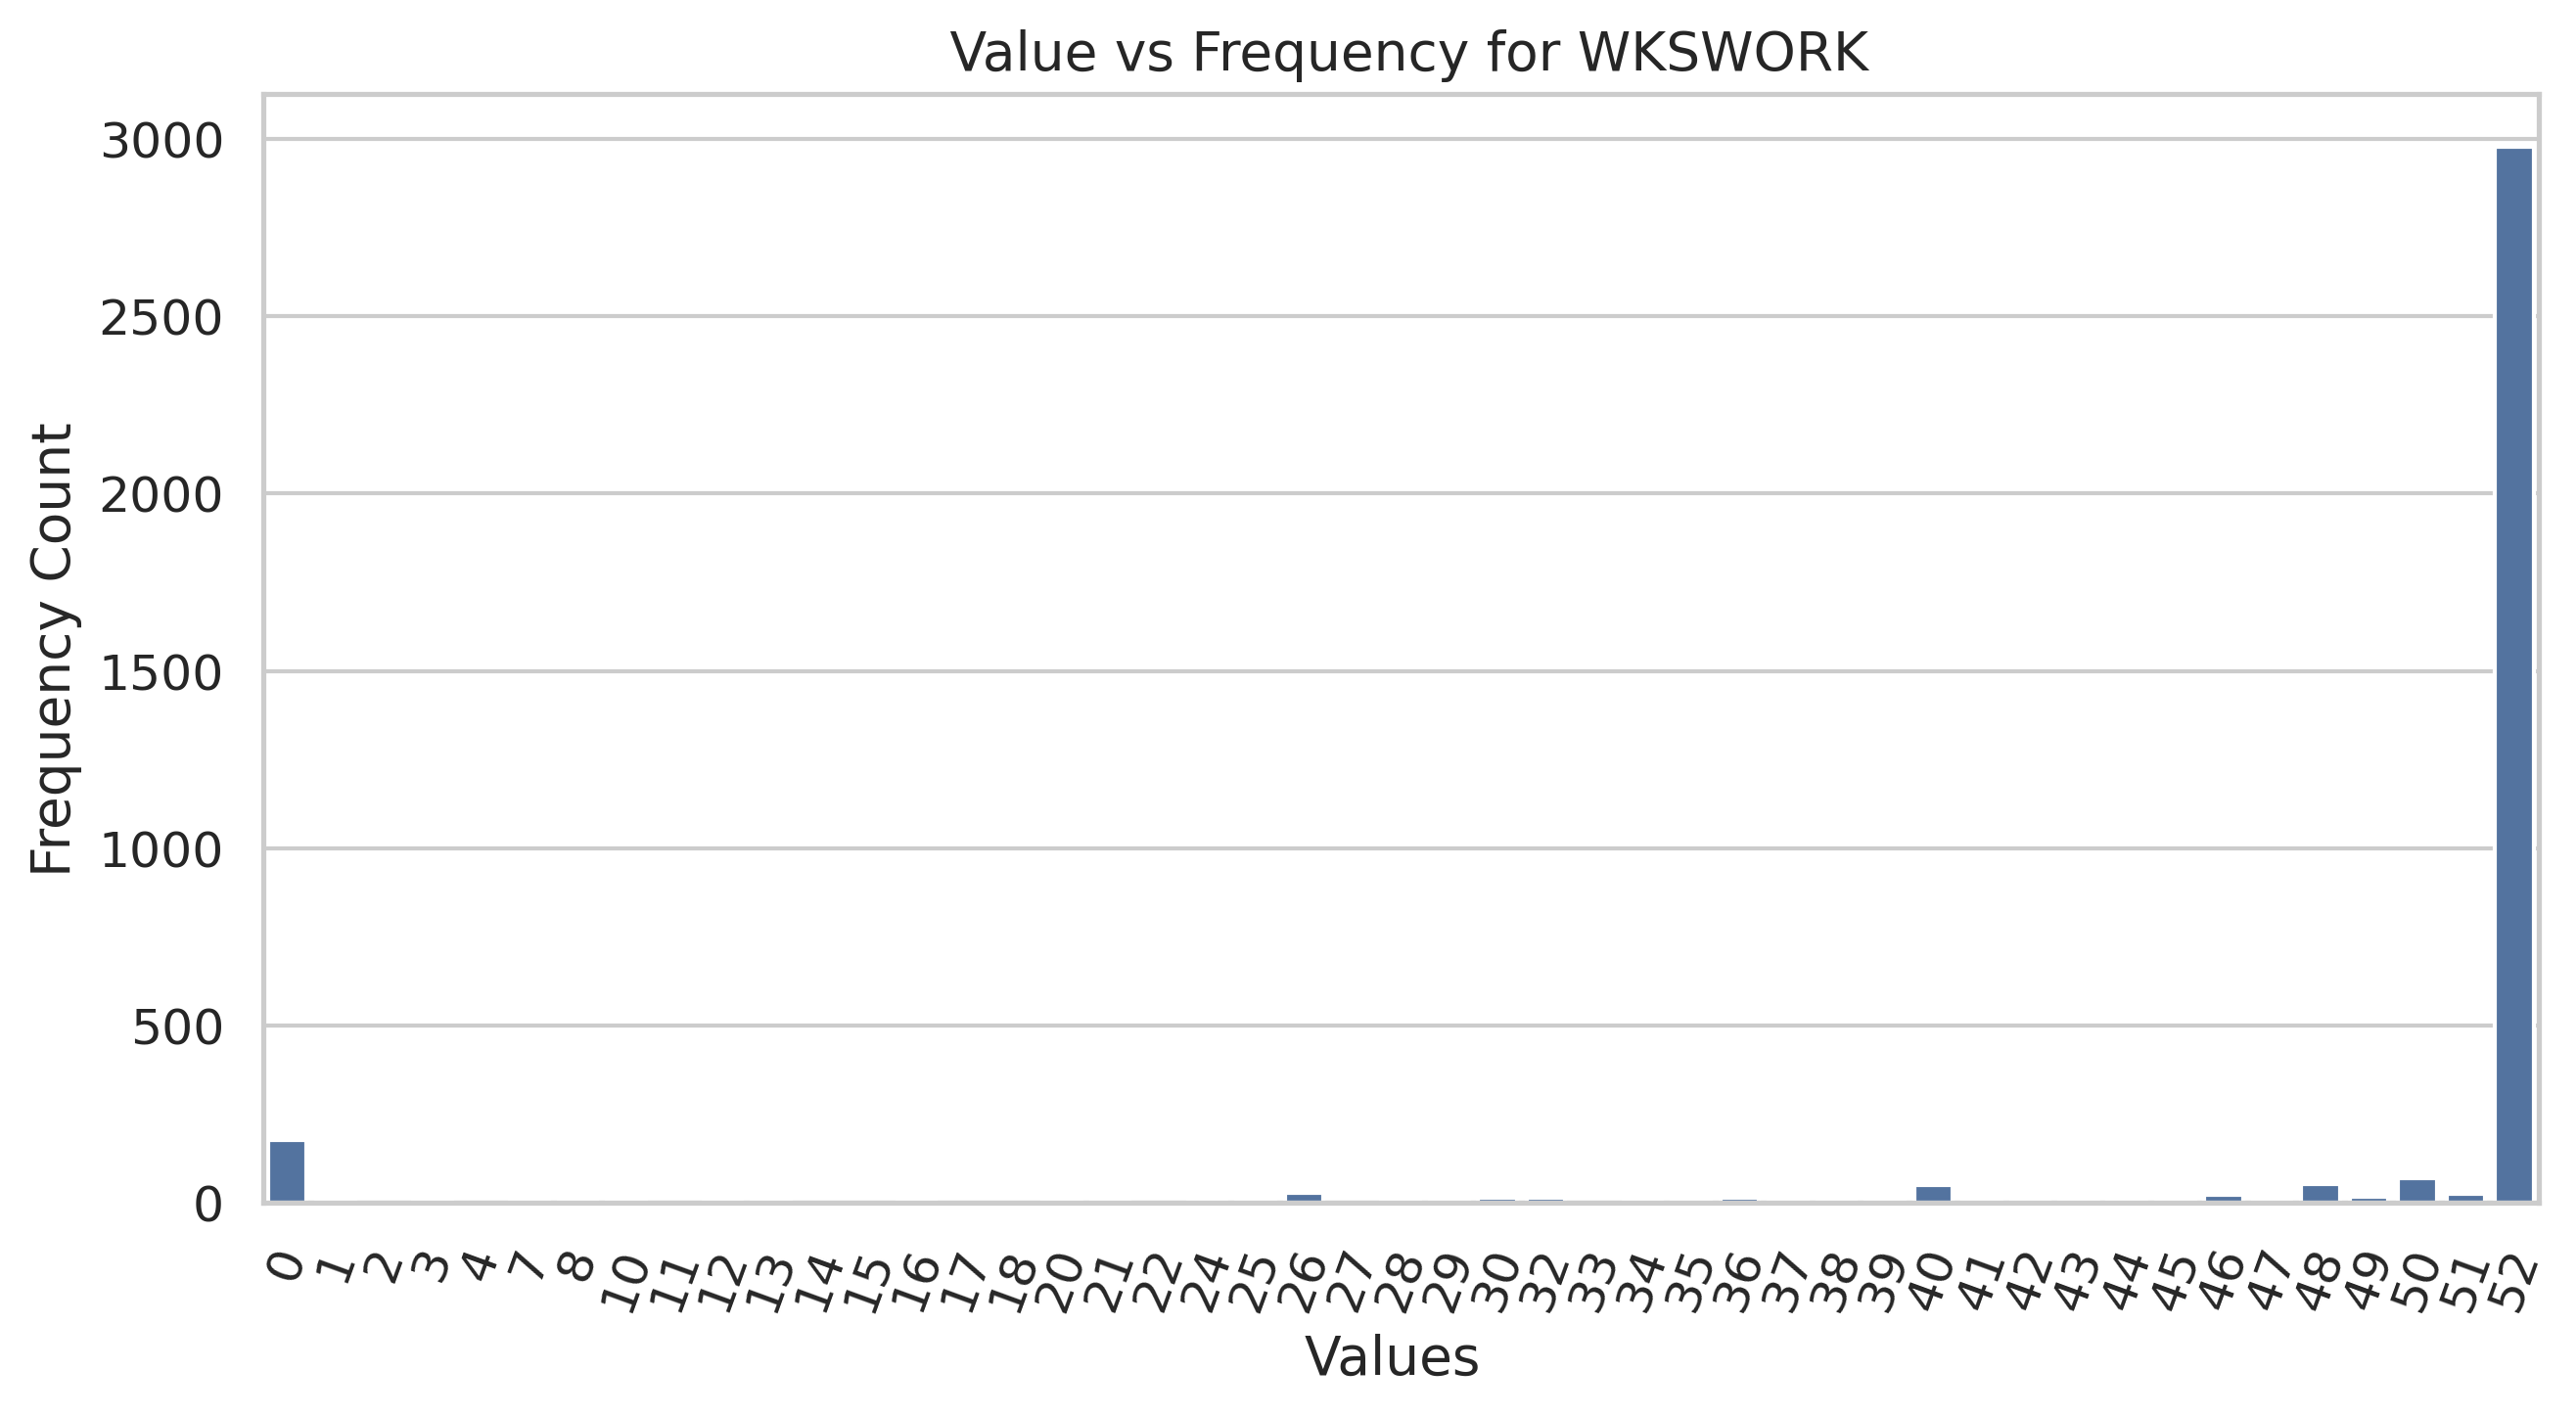

In [48]:
for i in numerical:
  x=dict(df[i].value_counts())
  #print(list(x.keys()))
  #print(list(x.values()))
  plt.clf()
  plt.xticks(rotation=70)
  sns.set(style='whitegrid', palette="deep" ,font_scale=1.1 )
  sns.barplot(x=list(x.keys()),y=list(x.values()),color='#4671AC').set(xlabel='Values ', ylabel='Frequency Count');
  plt.title(" Value vs Frequency for "+ i)
  plt.savefig("/content/drive/MyDrive/Assignment 3/plots/Pop_50/Numerical/histogram of "+i+".png")



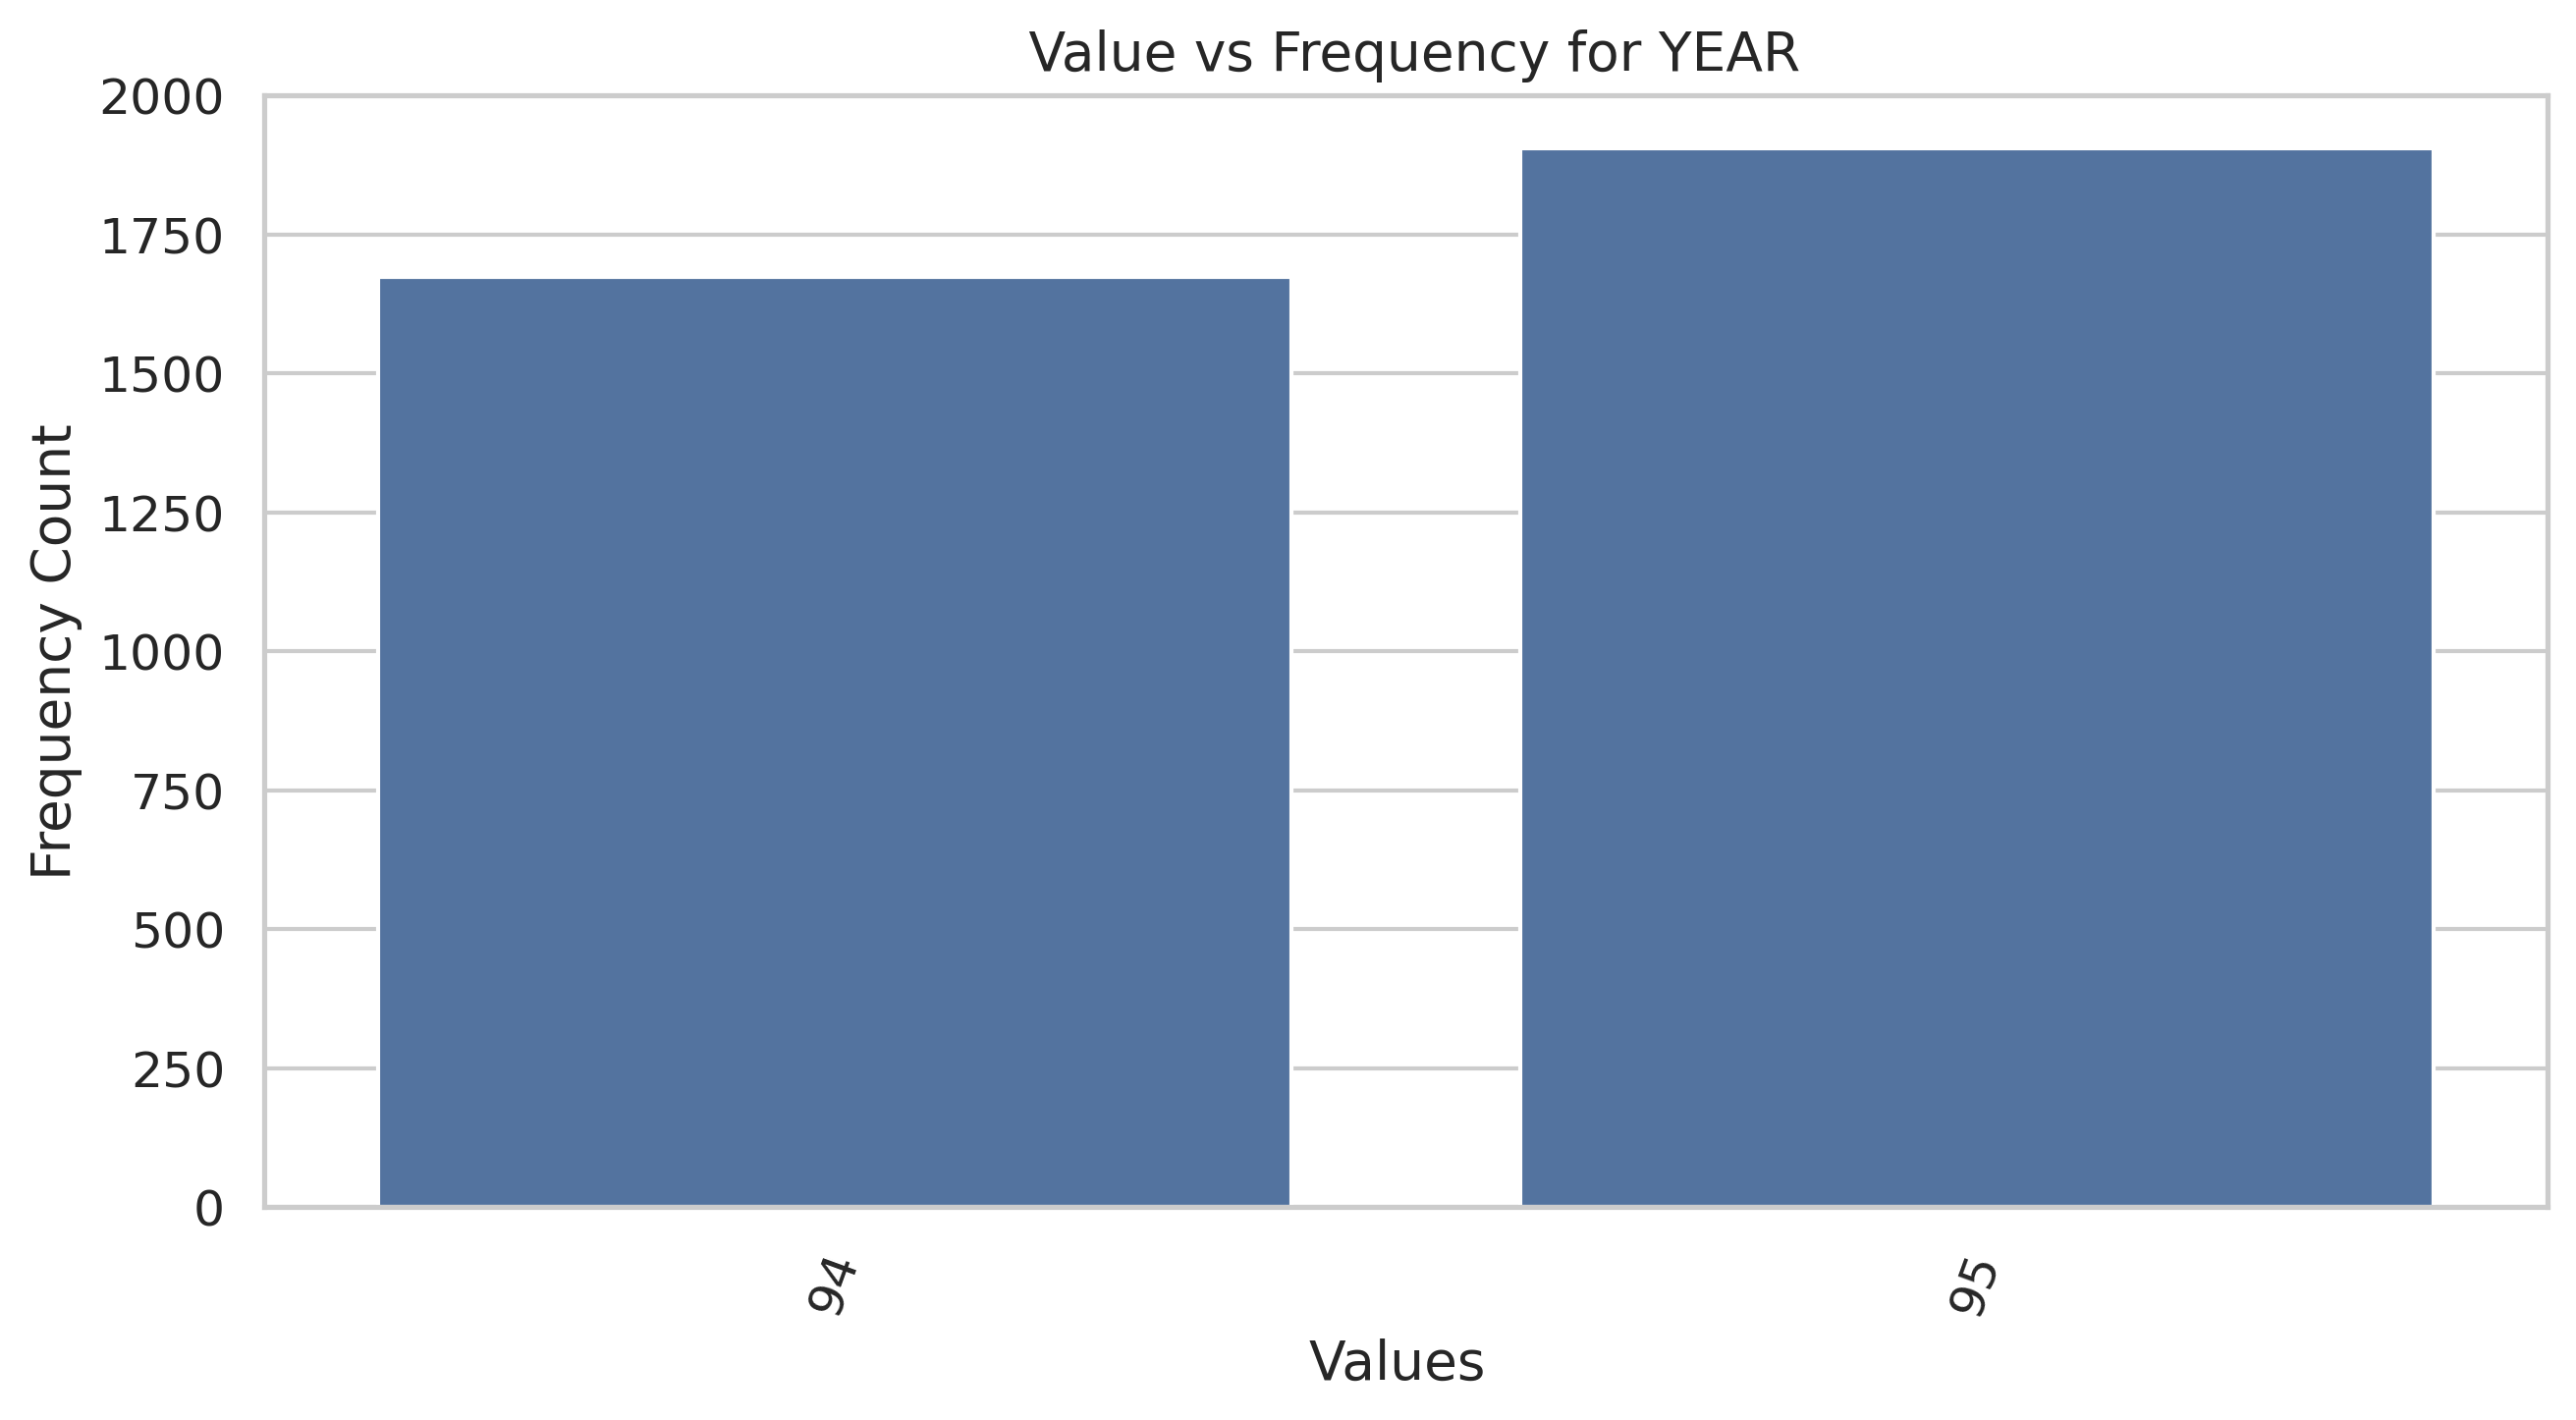

In [49]:
 for i in categorical:
  x=dict(df[i].value_counts())
  #print(list(x.keys()))
  #print(list(x.values()))
  plt.clf()
  plt.xticks(rotation=70)
  sns.set(style='whitegrid', palette="deep" ,font_scale=1.1 )
  sns.barplot(x=list(x.keys()),y=list(x.values()),color='#4671AC').set(xlabel='Values ', ylabel='Frequency Count');
  plt.title(" Value vs Frequency for "+ i)
  plt.savefig("/content/drive/MyDrive/Assignment 3/plots/Pop_50/Categorical/histogram of "+i+".png")


In [50]:
dropped_col=[]
for i in df.columns:
  x=dict(df[i].value_counts())
  if(max(x.values())>0.8*len(df)):
    dropped_col.append(i)
print(dropped_col,len(dropped_col))

for i in dropped_col:
  df.drop(i,axis=1,inplace=True)

print(len(df.columns))

['AHRSPAY', 'AHSCOL', 'ARACE', 'AREORGN', 'AUNMEM', 'AUNTYPE', 'CAPGAIN', 'CAPLOSS', 'GRINREG', 'GRINST', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN', 'WKSWORK'] 19
17


In [51]:
columns=df.columns
mode=[]

for i in columns:
  mod=df[i].mode()
  mode.append(mod)
  df[i].replace(to_replace = np.NaN, value = mod.get(i),inplace=True)

print(df.isnull().sum())

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AMARITL     0
AMJIND      0
AMJOCC      0
ASEX        0
AWKSTAT     0
DIVVAL      0
FILESTAT    0
HHDFMX      0
HHDREL      0
MIGSAME     0
NOEMP       0
YEAR        0
dtype: int64


In [52]:
df.dtypes

AAGE         int64
ACLSWKR     object
ADTIND       int64
ADTOCC       int64
AHGA        object
AMARITL     object
AMJIND      object
AMJOCC      object
ASEX        object
AWKSTAT     object
DIVVAL       int64
FILESTAT    object
HHDFMX      object
HHDREL      object
MIGSAME     object
NOEMP        int64
YEAR         int64
dtype: object

In [53]:
numerical.clear()
categorical.clear()
columns=df.columns
columns
for i in range(len(description["Column Code"])):
  for j in columns:
    if(j==description["Column Code"][i]):
      if(description["Type"][i]=='numerical'):
        numerical.append(j)
      else:
        categorical.append(j)
print(numerical)
print(categorical)


['AAGE', 'DIVVAL']
['ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AMARITL', 'AMJIND', 'AMJOCC', 'ASEX', 'AWKSTAT', 'FILESTAT', 'HHDFMX', 'HHDREL', 'MIGSAME', 'NOEMP', 'YEAR']


In [54]:
df['AAGE']=pd.cut(df['AAGE'], bins=[1,15,25,65,100],labels=['Child','Youth', 'Adult','Senior '] , include_lowest=True)

In [55]:
df['DIVVAL']=pd.cut(df['DIVVAL'], bins=[0,7,20,35,100],labels=['Fresher','Experienced', 'Highly-Experienced','Senior '],include_lowest=True )

In [56]:
print(df['AAGE'].dtype)
print(df['DIVVAL'].dtype)

category
category


In [57]:
numerical.clear()
categorical.clear()
columns=df.columns
columns
for i in range(len(description["Column Code"])):
  for j in columns:
    if(j==description["Column Code"][i]):
      if(description["Type"][i]=='numerical'):
        numerical.append(j)
      else:
        categorical.append(j)
print(numerical)
print(categorical)

['AAGE', 'DIVVAL']
['ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AMARITL', 'AMJIND', 'AMJOCC', 'ASEX', 'AWKSTAT', 'FILESTAT', 'HHDFMX', 'HHDREL', 'MIGSAME', 'NOEMP', 'YEAR']


In [58]:
def get_inertia(clusters,medians,sample):
    def euclidean_distance(p1, p2) :
        squareSum = 0
        n = len(p1)
        for i in range(n) :
            squareSum += (p1[i] - p2[i]) ** 2
        return squareSum ** 0.5
    n = len(clusters)
    inertia = 0
    for i in range(n) :
        for cc in clusters[i] :
            inertia+= euclidean_distance(sample.iloc[cc,:], medians[i])
    return inertia

In [59]:
enc_data=pd.get_dummies(df)
enc_data

,ADTIND,ADTOCC,NOEMP,YEAR,AAGE_Child,AAGE_Youth,AAGE_Adult,AAGE_Senior,ACLSWKR_ Federal government,ACLSWKR_ Local government,ACLSWKR_ Never worked,ACLSWKR_ Not in universe,ACLSWKR_ Private,ACLSWKR_ Self-employed-incorporated,ACLSWKR_ Self-employed-not incorporated,ACLSWKR_ State government,AHGA_ 10th grade,AHGA_ 11th grade,AHGA_ 12th grade no diploma,AHGA_ 1st 2nd 3rd or 4th grade,AHGA_ 5th or 6th grade,AHGA_ 7th and 8th grade,AHGA_ 9th grade,AHGA_ Associates degree-academic program,AHGA_ Associates degree-occup /vocational,AHGA_ Bachelors degree(BA AB BS),AHGA_ Doctorate degree(PhD EdD),AHGA_ High school graduate,AHGA_ Masters degree(MA MS MEng MEd MSW MBA),AHGA_ Prof school degree (MD DDS DVM LLB JD),AHGA_ Some college but no degree,AMARITL_ Divorced,AMARITL_ Married-A F spouse present,AMARITL_ Married-civilian spouse present,AMARITL_ Married-spouse absent,AMARITL_ Never married,AMARITL_ Separated,AMARITL_ Widowed,AMJIND_ Agriculture,AMJIND_ Armed Forces,...,ASEX_ Male,AWKSTAT_ Children or Armed Forces,AWKSTAT_ Full-time schedules,AWKSTAT_ Not in labor force,AWKSTAT_ PT for econ reasons usually FT,AWKSTAT_ PT for econ reasons usually PT,AWKSTAT_ PT for non-econ reasons usually FT,AWKSTAT_ Unemployed full-time,AWKSTAT_ Unemployed part- time,DIVVAL_Fresher,DIVVAL_Experienced,DIVVAL_Highly-Experienced,DIVVAL_Senior,FILESTAT_ Head of household,FILESTAT_ Joint both 65+,FILESTAT_ Joint both under 65,FILESTAT_ Joint one under 65 & one 65+,FILESTAT_ Nonfiler,FILESTAT_ Single,HHDFMX_ Child 18+ ever marr Not in a subfamily,HHDFMX_ Child 18+ ever marr RP of subfamily,HHDFMX_ Child 18+ never marr Not in a subfamily,HHDFMX_ Householder,HHDFMX_ Nonfamily householder,HHDFMX_ Other Rel 18+ ever marr RP of subfamily,HHDFMX_ Other Rel 18+ ever marr not in subfamily,HHDFMX_ Other Rel 18+ never marr not in subfamily,HHDFMX_ Other Rel 18+ spouse of subfamily RP,HHDFMX_ RP of unrelated subfamily,HHDFMX_ Secondary individual,HHDFMX_ Spouse of RP of unrelated subfamily,HHDFMX_ Spouse of householder,HHDREL_ Child 18 or older,HHDREL_ Householder,HHDREL_ Nonrelative of householder,HHDREL_ Other relative of householder,HHDREL_ Spouse of householder,MIGSAME_ No,MIGSAME_ Not in universe under 1 year old,MIGSAME_ Yes
0,11,2,2,95,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,3,38,4,94,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,19,26,6,94,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,33,2,2,95,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,11,5,6,95,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,14,37,6,94,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3576,37,12,1,94,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3577,41,6,6,95,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3578,35,2,2,94,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,.

In [60]:
def get_inertia(clusters,medians,sample):
    def euclidean_distance(p1, p2) :
        squareSum = 0
        n = len(p1)
        ls=[]
        ls.append(n)
        for i in range(n) :
            squareSum += (p1[i] - p2[i]) ** 2
            ls.append(len(p1))
        return squareSum ** 0.5
    n = len(clusters)
    inertia = 0
    ls=[]
    ls.append(inertia+n)
    for i in range(n) :
        ls=[]
        for cc in clusters[i] :
            ls.append(cc)
            inertia+= euclidean_distance(sample.iloc[cc,:], medians[i])
    return inertia

In [70]:
pca = PCA(n_components=100)
principalComponents = pca.fit_transform(enc_data)
features = range(pca.n_components_)
ratios=pca.explained_variance_ratio_*100

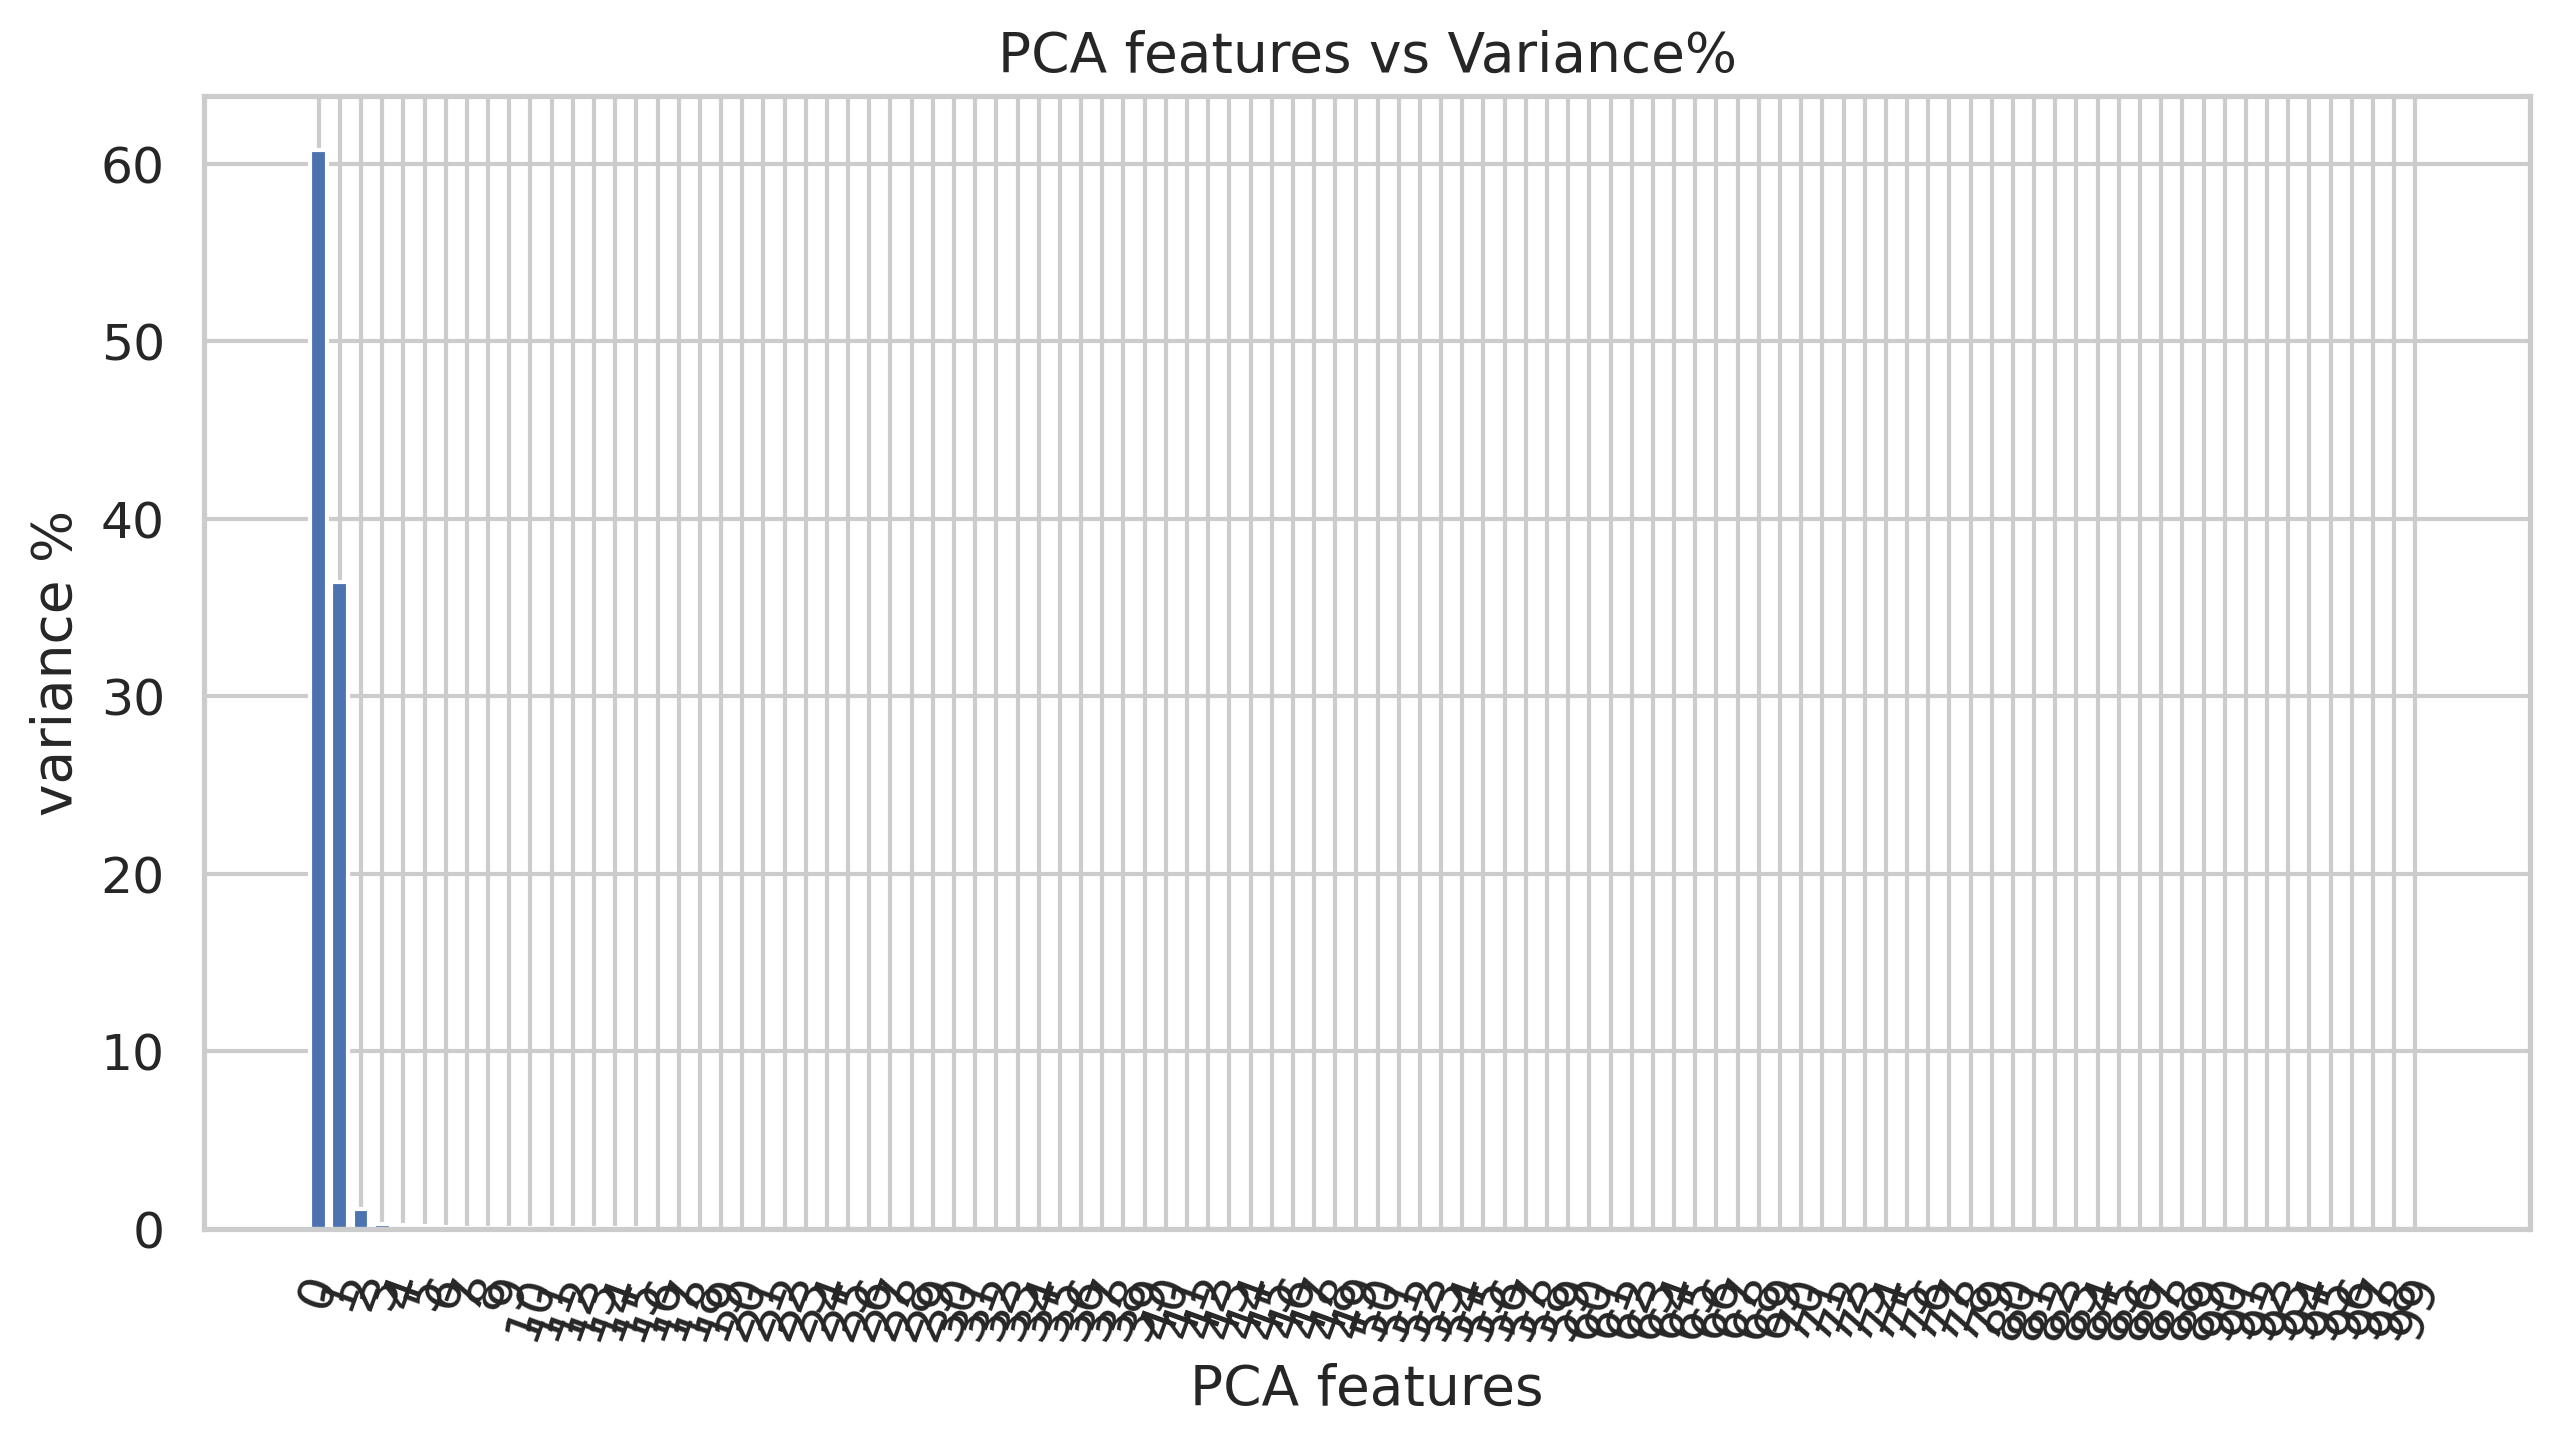

In [72]:
  plt.clf()
  plt.bar(features, ratios)
  plt.xlabel('PCA features')
  plt.ylabel('variance %')
  plt.xticks(features,rotation=70)
  plt.title("PCA features vs Variance%")
  plt.show()

In [62]:
K = range(10, 25)
inertias = []
for k in K:
    ls=[]
    sample=pd.DataFrame(principalComponents).iloc[:,:3]
    initial_medians = [np.random.random(3) for _ in range(k)]
    kmedians_instance = kmedians(sample, initial_medians)
    ls.append(kmedians_instance)
    kmedians_instance.process()
    ls.append(kmedians_instance)
    clusters = kmedians_instance.get_clusters()
    ls.append(cluster)
    medians = kmedians_instance.get_medians()
    inertias.append(get_inertia(clusters,medians,sample))
    ls.append(inertias)
    print(k,end=" ")
inertias

10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 

[19979.690360815443,
 16925.960968874748,
 16598.919456220323,
 16765.576501150823,
 20043.090356039793,
 15424.741819680468,
 14026.763399672414,
 13764.210565908279,
 14785.153672118722,
 14332.65125846222,
 15869.493462519407,
 14832.116819245766,
 13135.697206446615,
 12964.850379290016,
 14089.574477029364]

In [63]:
inertias=[1698.7691205661285,
 1557.1663925477317,
 1491.1725203778963,
 1480.019732789707,
 1831.1351237170143,
 1742.7261964405807,
 1361.201236463472,
 1439.7331315837494,
 1682.6589332004603,
 1374.491876503836,
 1351.0740203361124,
 1312.591064850417,
 1269.8115964760807,
 1478.5167477831042,
 1252.5331204691513]

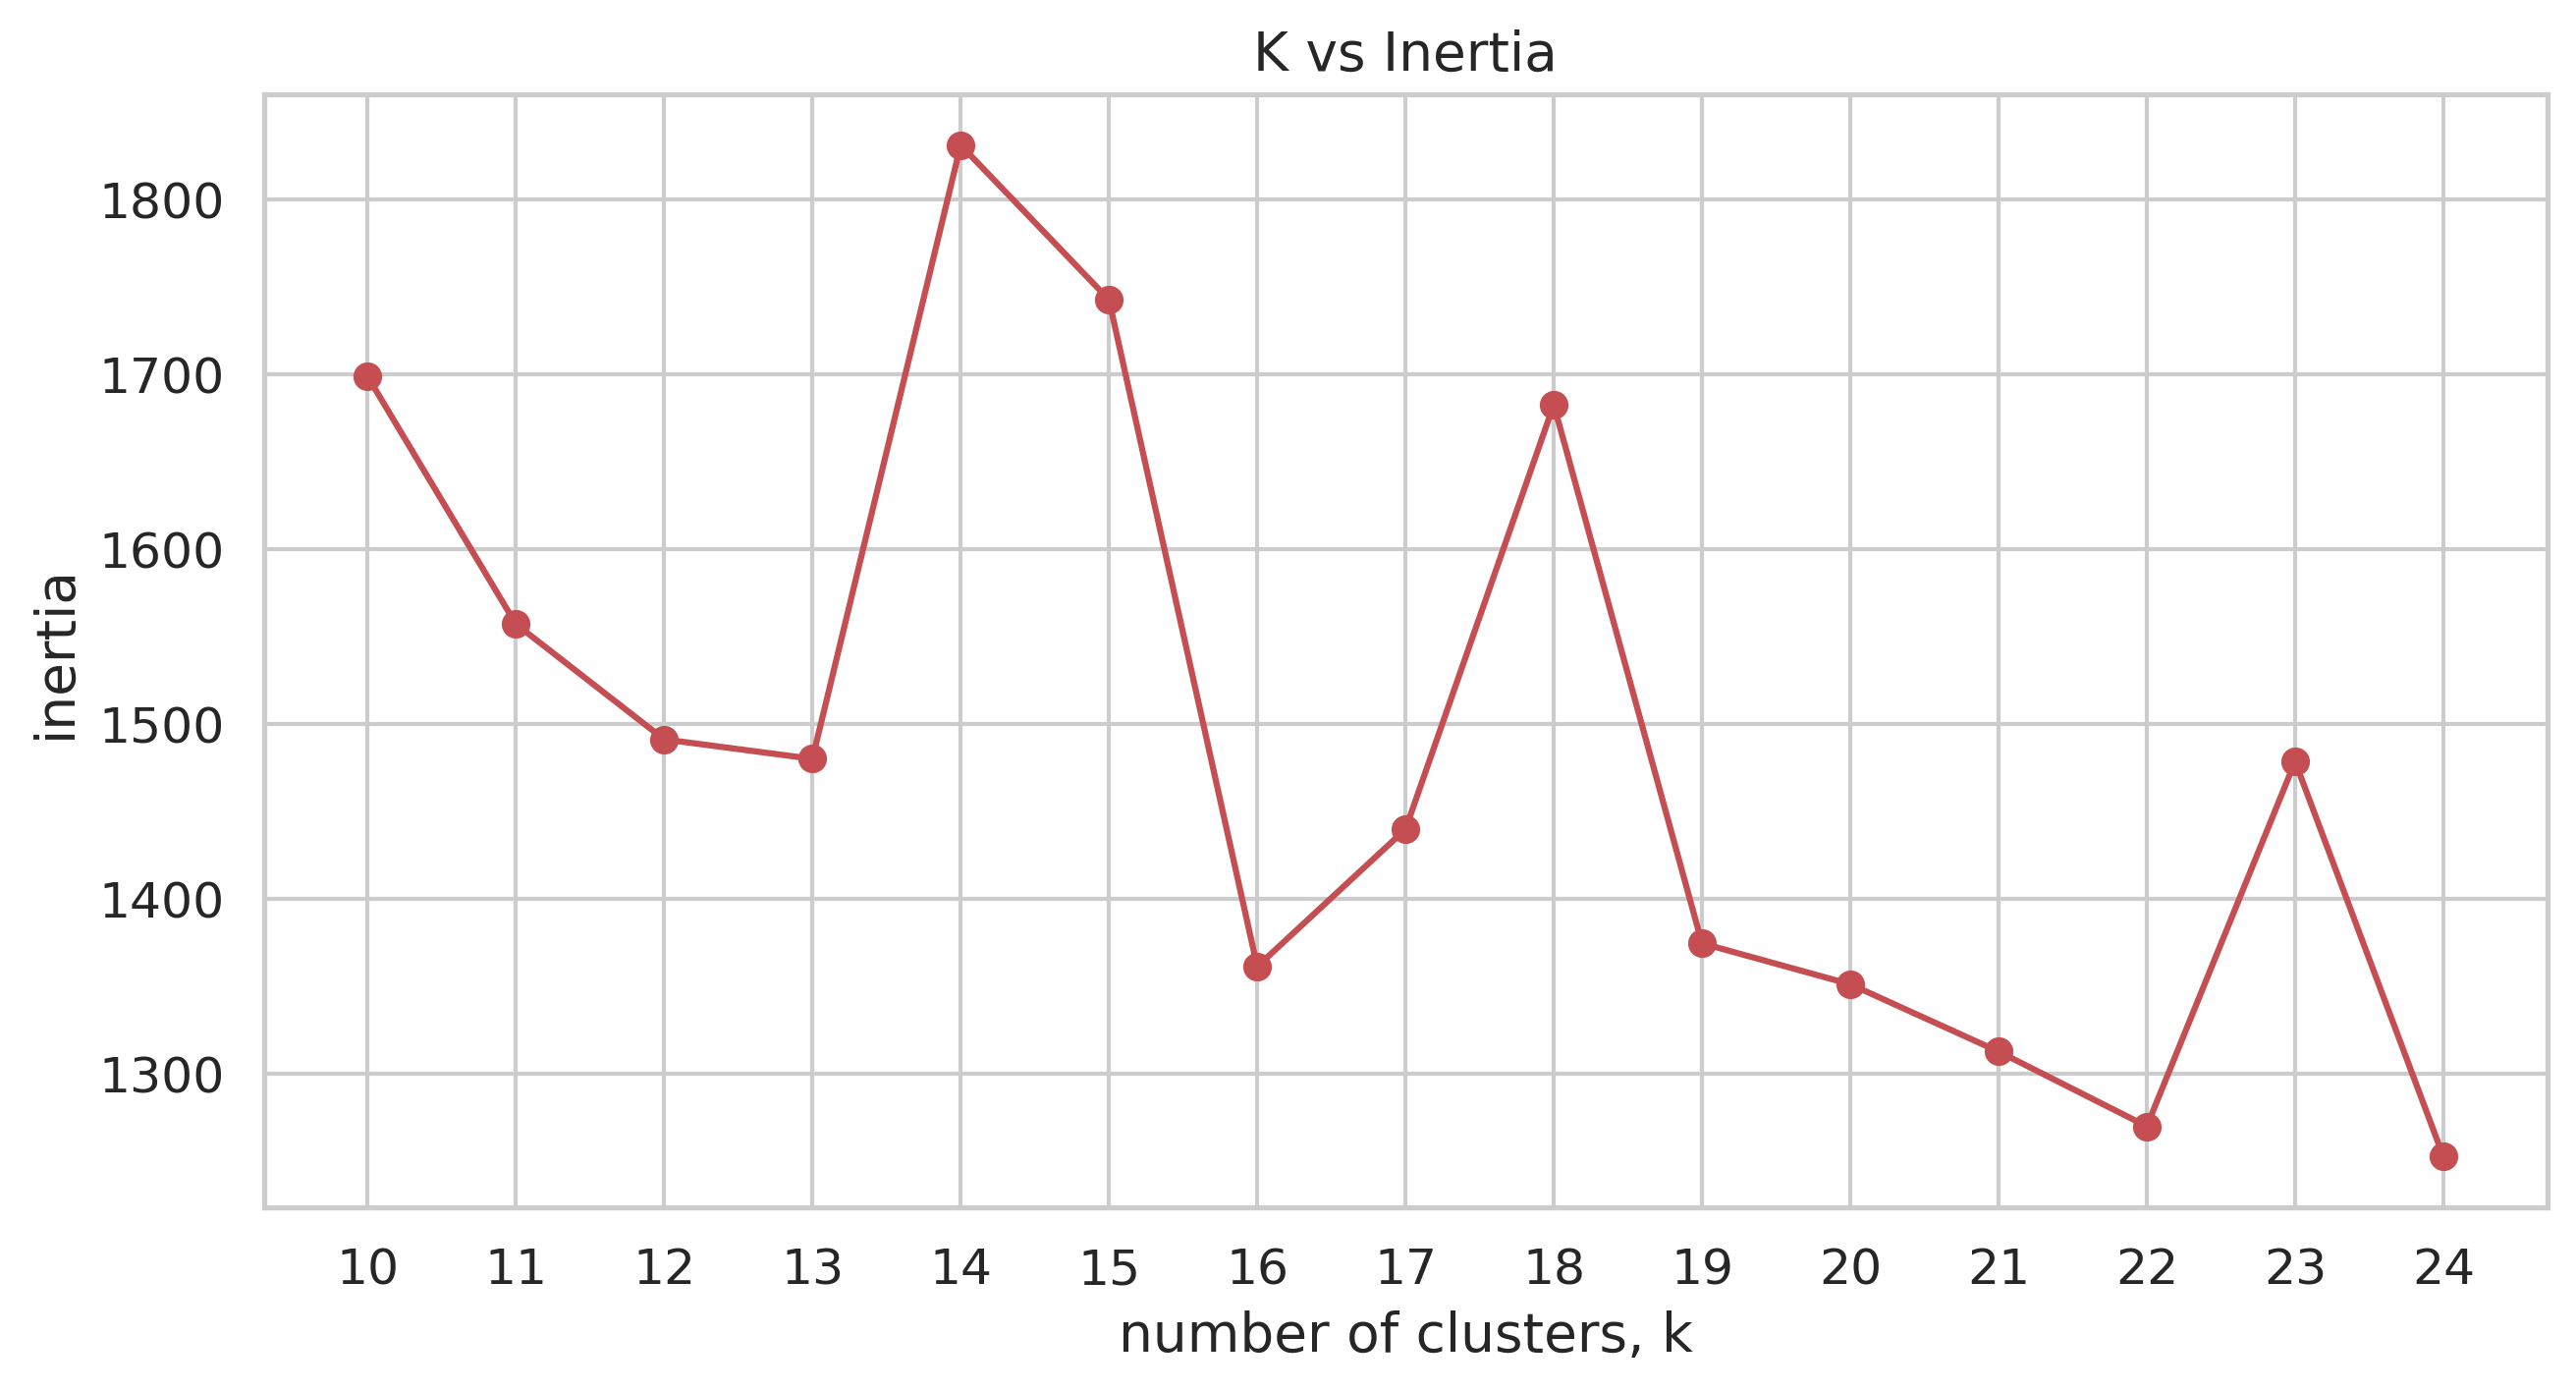

In [64]:
K=range(10,25)
plt.plot(K, inertias, '-o', color='r')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title("K vs Inertia")
plt.xticks(K)
plt.savefig("/content/drive/MyDrive/Assignment 3/plots/Pop_50/"+"K vs Inertia.png")

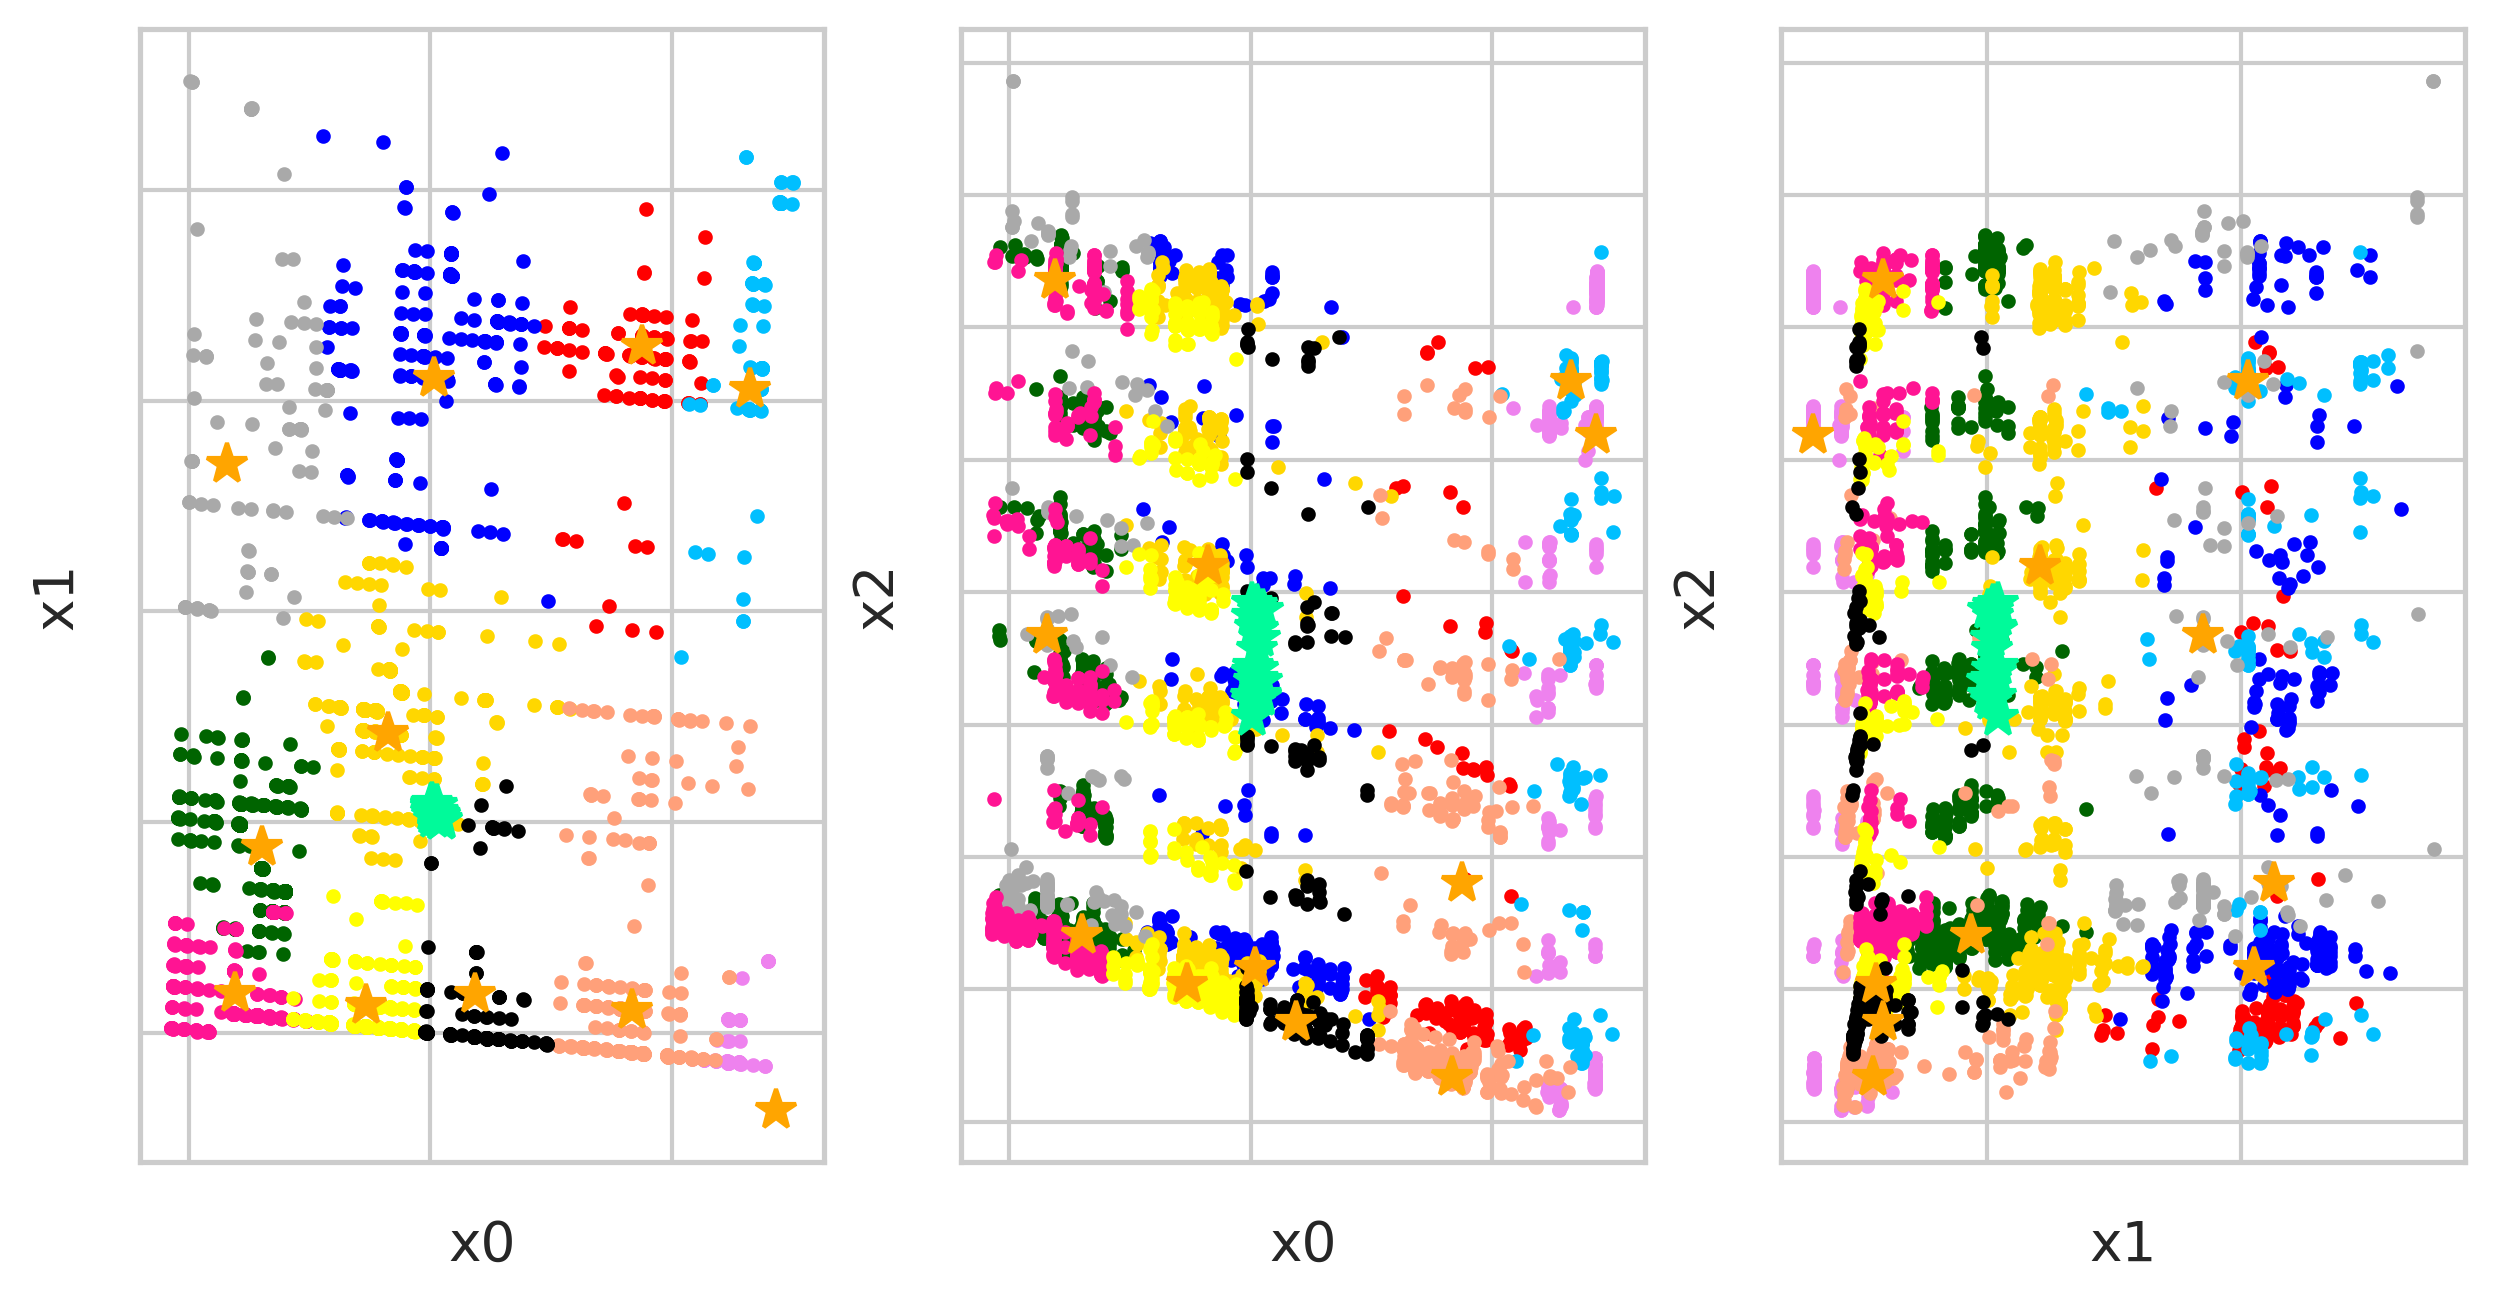

11

In [67]:
K=20
visual=[]

temp_df=pd.DataFrame(principalComponents).iloc[:10000,:3]
visual.append(K)
initial_medians = [ np.random.random(3) for _ in range(K)]
sample=temp_df.values.tolist()
visual.append(sample)
kmedians_instance = kmedians(sample, initial_medians)
kmedians_instance.process()
visual.append(kmedians_instance)
clusters = kmedians_instance.get_clusters()
medians = kmedians_instance.get_medians()
visualizer = cluster_visualizer_multidim()
visual.append(kmedians_instance)
visualizer.append_clusters(clusters, list(sample))
visualizer.append_cluster(initial_medians, marker='*', markersize=10)
visualizer.append_cluster(medians, marker='*', markersize=10)
visualizer.show()
